In [ ]:
import pickle
from pathlib import Path
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

def load_perturbed_graph():
    """
    Load the perturbed graph from the data directory stored as graph.pkl
    """
    graph_path = Path("graph.pkl")
    if not graph_path.exists():
        raise FileNotFoundError(f"Graph file not found: {graph_path}. Please run graph perturbation first.")
    
    with open(graph_path, "rb") as f:
        G = pickle.load(f)
    
    return G


def load_gene_mapping():
    """
    Load the gene_to_idx mapping from the shared data directory stored as gene_to_idx.pkl
    This mapping is created by data_creation.py and used by graph_perturbation.py
    """
    # First try experiment-specific path (for backward compatibility)
    mapping_path = Path("gene_to_idx.pkl")
    if mapping_path.exists():
        with open(mapping_path, "rb") as f:
            gene_to_idx = pickle.load(f)
        return gene_to_idx
    
    # Then try shared data path (canonical location)
    shared_mapping_path = "gene_to_idx.pkl"
    if not shared_mapping_path.exists():
        raise FileNotFoundError(f"Gene mapping file not found at {mapping_path} or {shared_mapping_path}. Please run data creation first.")
    
    with open(shared_mapping_path, "rb") as f:
        gene_to_idx = pickle.load(f)
    
    return gene_to_idx

def read_node_values():
    """
    Read the node values from the data directory stored as node_values.pkl
    """
    node_values_path = Path("0.pt")
    if not node_values_path.exists():
        raise FileNotFoundError(f"Node values file not found: {node_values_path}. Please run data creation first.")
    
    # use torch to load the node values
    import torch
    node_values = torch.load(node_values_path, weights_only=False)
    
    return node_values


def plot_graph(G, gene_mapping, perturbed_gene, difference):
    # read graph.pkl and print the number of nodes and edges

    # Convert torch_geometric.data.Data to networkx graph
    nx_G = to_networkx(G)

    # Rename nodes in nx_G using mapping (reverse mapping: idx -> gene name)
    reverse_mapping = {v: k for k, v in gene_mapping.items()}
    nx_G = nx.relabel_nodes(nx_G, reverse_mapping)

    print("Number of nodes:", nx_G.number_of_nodes())
    print("Number of edges:", nx_G.number_of_edges())

    # color the nodes in the graph. perturbed_gene in yellow, every other node with 
    # difference != 0 in red, and every other node in blue
    color_map = []
    for node in nx_G:
        if node == perturbed_gene:
            color_map.append('yellow')
        elif difference[gene_mapping[node]] != 0:
            color_map.append('red')
        else:
            color_map.append('blue')
    plt.figure(figsize=(12, 12))
    nx.draw(nx_G, with_labels=True, node_size=1000,font_size=8, node_color=color_map)
    plt.show()

In [17]:
G = load_perturbed_graph()
gene_mapping = load_gene_mapping()
node_values = read_node_values()
perturbed_gene = node_values['perturbed_gene']
difference = node_values['difference']

Number of nodes: 39
Number of edges: 74


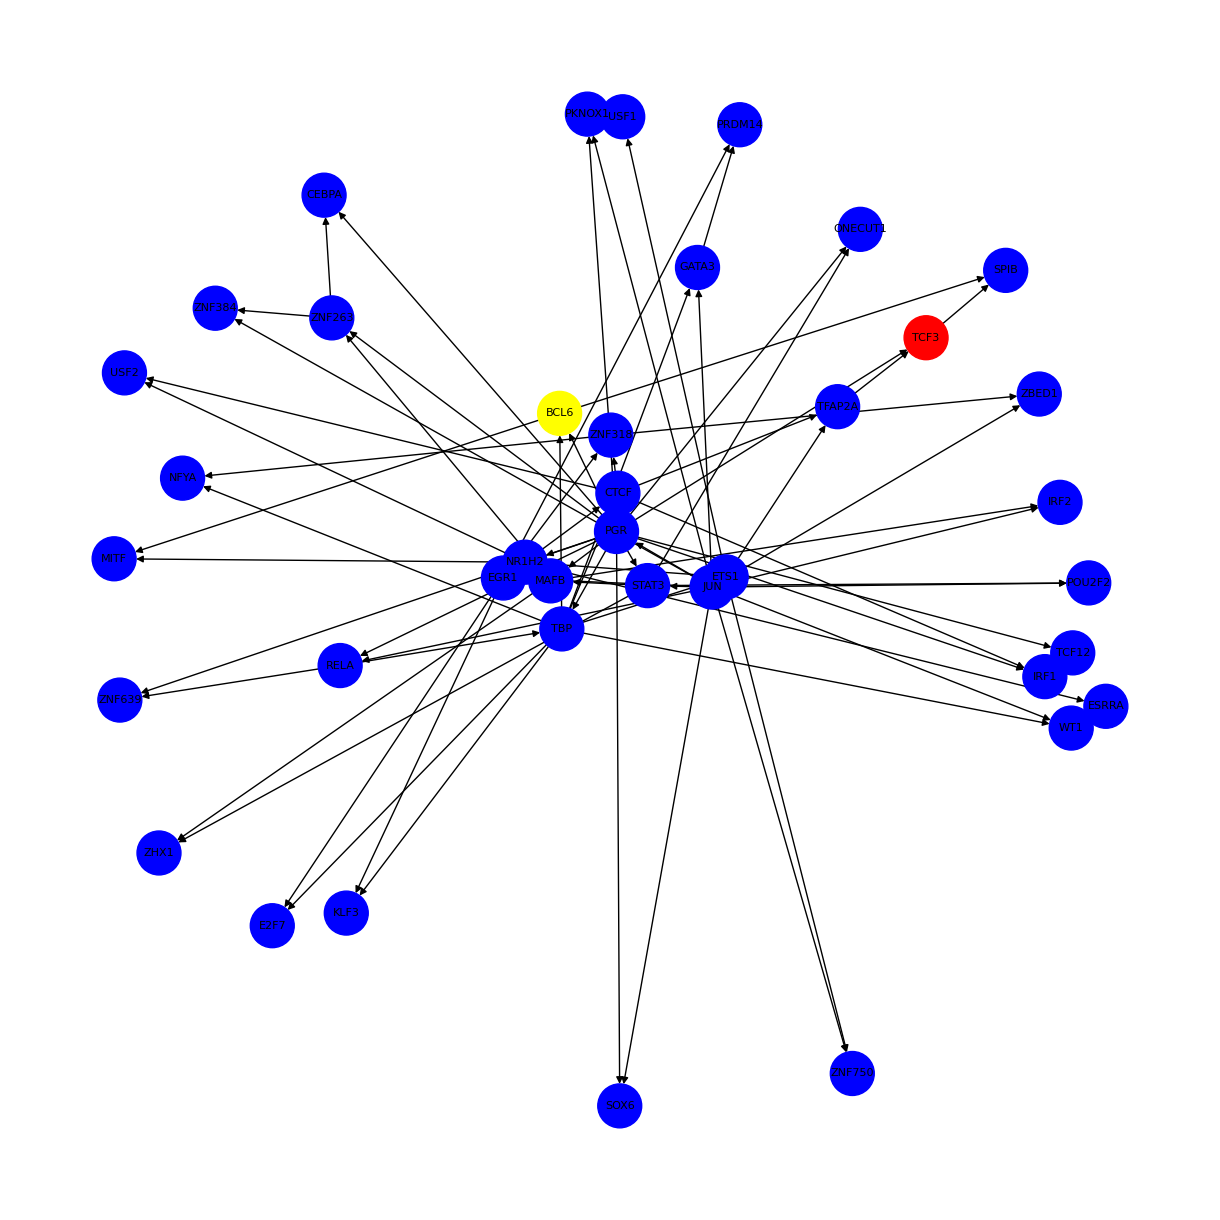